In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [22]:
train = pd.read_csv("digit-recognizer/train.csv")
print(train.shape)
train.head()

test = pd.read_csv("digit-recognizer/test.csv")
print(test.shape)
train.head()

(42000, 785)
(28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Y_train=train['label']

In [7]:
X_train=train.drop(labels=['label'], axis=1)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

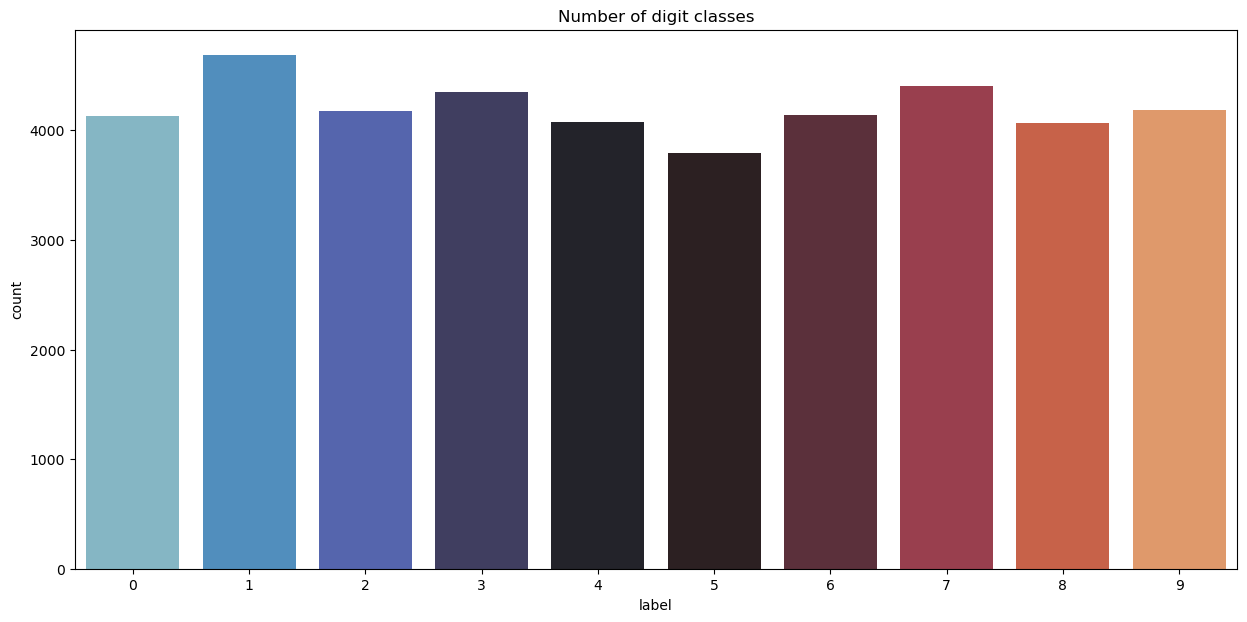

In [10]:
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

In [13]:
img=X_train.iloc[0].values
img=img.reshape((28,28))
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,
          0,   0],
       [  

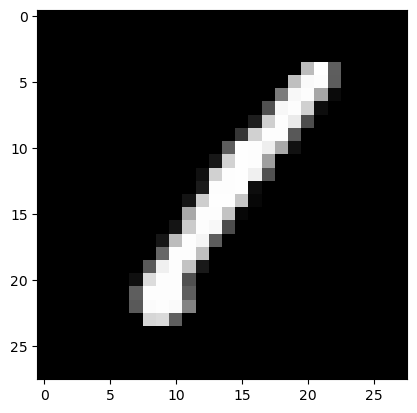

In [20]:
plt.imshow(img,cmap='gray')

In [23]:
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [28]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

In [31]:
X_train.shape

(42000, 28, 28, 1)

In [32]:
test.shape

(28000, 28, 28, 1)

In [33]:
from keras.utils.np_utils import to_categorical

In [35]:
Y_train = to_categorical(Y_train)

In [36]:
Y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

In [38]:
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


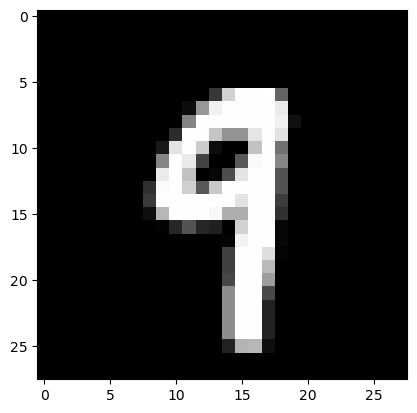

In [42]:
plt.imshow(X_train[2], cmap='gray')

In [43]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [87]:
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [88]:
opt=Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [89]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [90]:
epochs = 10
batch_size=250

In [ ]:
#conv => max pool => dropout => conv => max pool => dropout => fully connected

In [55]:
import cv2 as cv

In [58]:
img = cv.cvtColor(cv.imread('cat.jpg'), cv.COLOR_BGR2RGB)

In [59]:
def show_image(img):
    plt.figure(figsize=(8,8))
    plt.imshow(img)
    plt.axis('off')

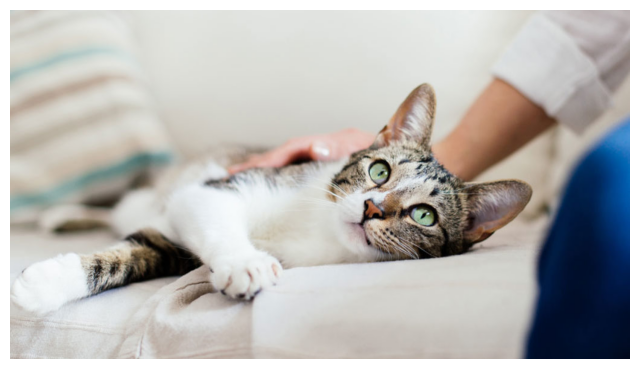

In [60]:
show_image(img)

In [79]:
data_generator = ImageDataGenerator(rotation_range=45.0)

In [80]:
image_batch = np.expand_dims(img,axis=0)

In [81]:
data_generator.fit(image_batch)
data_gen_iter = data_generator.flow(image_batch) # 이미지 증식 실행

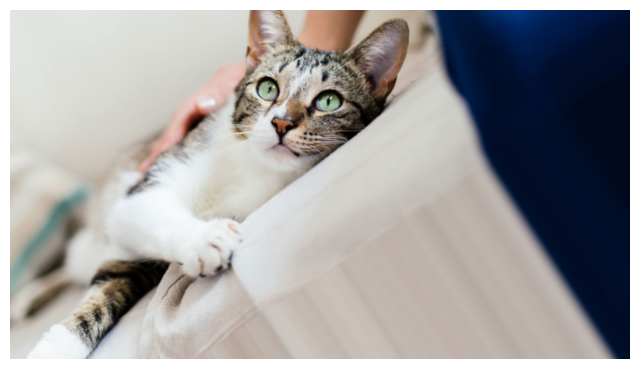

In [82]:
aug_image_batch = next(data_gen_iter)
aug_image = np.squeeze(aug_image_batch)
aug_image = aug_image.astype('int')
show_image(aug_image)

In [84]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False, 
        zca_whitening=False,
        rotation_range=5,  
        zoom_range = 0.1,
        width_shift_range=0.1, 
        height_shift_range=0.1, 
        horizontal_flip=False, 
        vertical_flip=False) 

datagen.fit(X_train)

In [91]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 10s 64ms/step - loss: 1.9798 - accuracy: 0.3145 - val_loss: 1.0032 - val_accuracy: 0.7112
Epoch 2/10
151/151 [==============================] - 10s 64ms/step - loss: 1.2668 - accuracy: 0.5682 - val_loss: 0.7151 - val_accuracy: 0.7957
Epoch 3/10
151/151 [==============================] - 10s 63ms/step - loss: 1.0910 - accuracy: 0.6344 - val_loss: 0.5969 - val_accuracy: 0.8324
Epoch 4/10
151/151 [==============================] - 9s 62ms/step - loss: 0.9478 - accuracy: 0.6850 - val_loss: 0.5005 - val_accuracy: 0.8581
Epoch 5/10
151/151 [==============================] - 10s 65ms/step - loss: 0.8522 - accuracy: 0.7190 - val_loss: 0.4372 - val_accuracy: 0.8767
Epoch 6/10
151/151 [==============================] - 10s 64ms/step - loss: 0.7866 - accuracy: 0.7407 - val_loss: 0.4029 - val_accuracy: 0.8952
Epoch 7/10
151/151 [==============================] - 11s 70ms/step - loss: 0.7478 - accuracy: 0.7528 - val_loss: 0.3834 - val_accuracy: 